##  **1.Business Understanding**

#### Name	Attribute/Target	Description
**ID**	-N/A	-Unique number to represent patient ID

**PRG**	-Attribute1	-Plasma glucose

**PL**	-Attribute 2 -Blood Work Result-1 (mu U/ml)

**PR**	-Attribute 3 -Blood Pressure (mm Hg)

**SK**	-Attribute 4 -Blood Work Result-2 (mm)

**TS**	-Attribute 5 -Blood Work Result-3 (mu U/ml)

**M11**	-Attribute 6 -Body mass index (weight in kg/(height in m)^2)

**BD2**	-Attribute 7 -Blood Work Result-4 (mu U/ml)

**Age**	-Attribute 8 -patients age (years)

**Insurance** -N/A	-If a patient holds a valid insurance card

**Sepssis**	-Target	-Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

#### **Questions**
1. Does Age affect Blood Pressure(PR)?
2. How many Patients Have Insurance Cover?
3. What is the concentrated age group of most patients? And do they have Insurance Cover?
4. Does high PRG contribute to Sepssis?
5. What is the highest type of blood work done?

#### **Hypothesis**
* Null: High Body Mass does not attribute to high Blood Pressure(PR)
* Alternative : High body mass(M11) attributes to high Blood Pressure(PR)

##  **2.Data Understanding**

In [573]:
# import the necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import plotly.express as px  

#Data Understanding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler,FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import RandomOverSampler, SMOTE



from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import joblib


import warnings

warnings.filterwarnings('ignore')

#### Load Datasets

In [506]:
# Load the test dataset
df_test = pd.read_csv("./data/Paitients_Files_Test.csv")
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [507]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


#### Perform EDA on Test Data

In [508]:
df_test.duplicated().sum()

0

In [509]:
df_test.isna().sum().sum()

0

In [510]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


#### Perform EDA on Train Data

In [511]:
# Load the train dataset
df = pd.read_csv("./data/Paitients_Files_Train.csv")
df.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [513]:
df.duplicated().sum()

0

In [514]:
df.isna().sum().sum()

0

In [515]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


#### Univariate analysis

<Figure size 6000x2000 with 0 Axes>

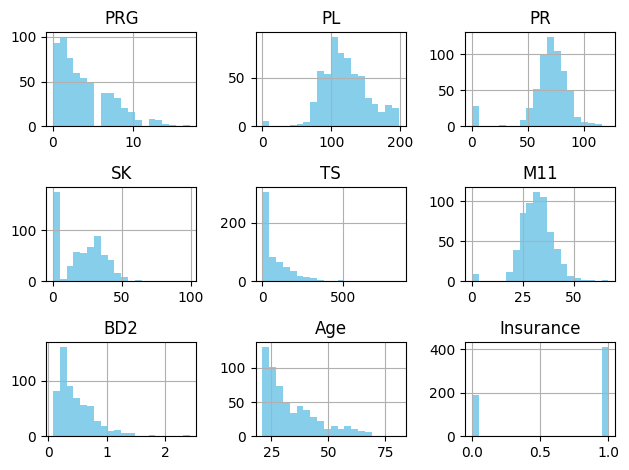

In [516]:
plt.figure(figsize=(60,20))
df.hist(color='skyblue',bins=20)
plt.tight_layout()
plt.show();

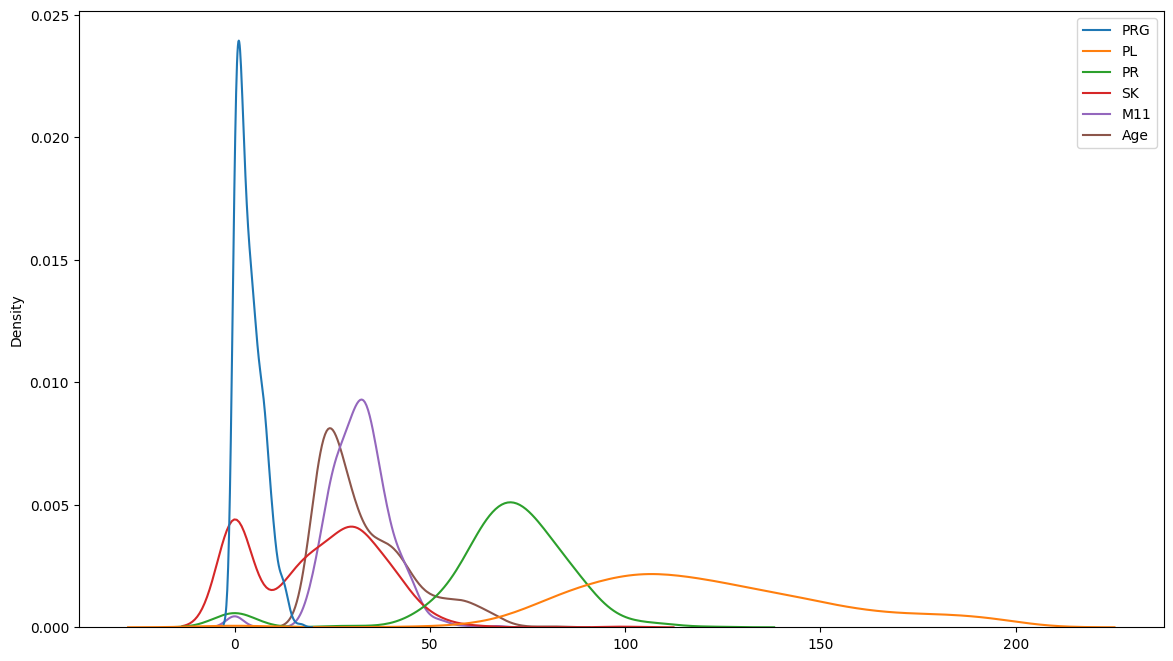

In [517]:
plt.figure(figsize=(14,8))
sns.kdeplot(df.drop(['Sepssis','TS','ID','BD2','Insurance'],axis=1))
plt.show();

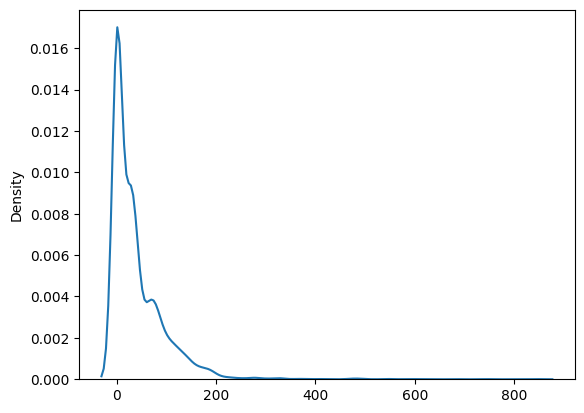

In [518]:

sns.kdeplot(df.drop(['ID','Sepssis'],axis=1).values.ravel());


In [519]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

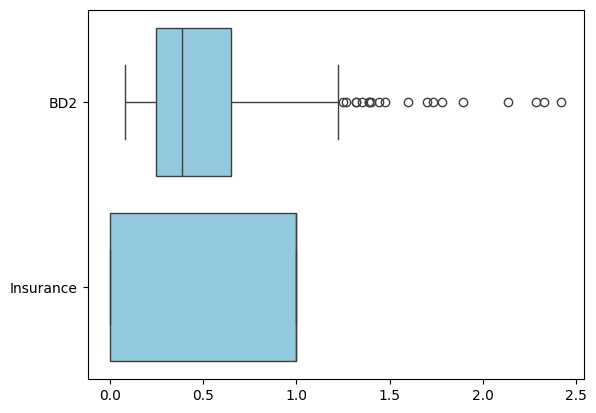

In [520]:
data3 =df[['BD2', 'Insurance']]
sns.boxplot(data=data3,color='Skyblue',orient='h');
# boxplot = df.boxplot(column=['BD2', 'Insurance'],vert=False,grid=False)

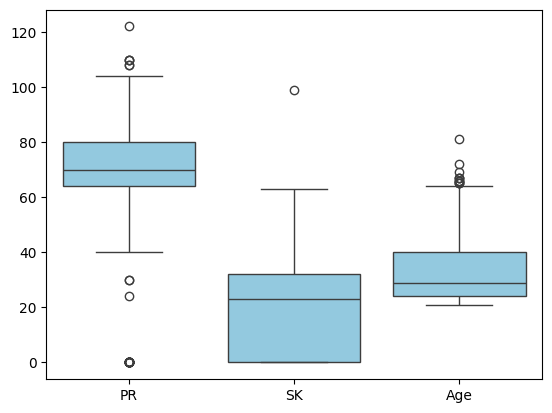

In [521]:
data1 =df[['PR', 'SK','Age']]
sns.boxplot(data=data1,color=('skyblue'));
#boxplot = df.boxplot(column=['PR', 'SK','Age'],vert=False,grid=False)

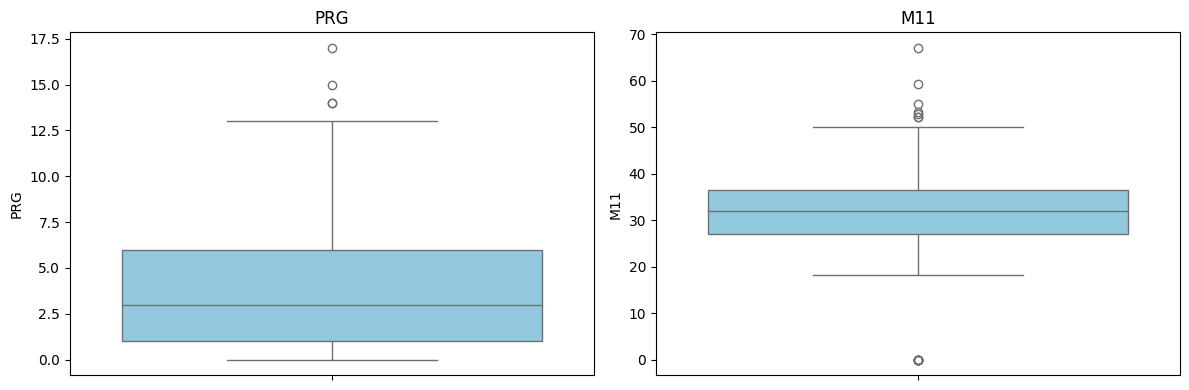

In [522]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for 'PRG'
sns.boxplot(data=df, y='PRG', color='skyblue', ax=axs[0])
axs[0].set_title('PRG')

# Boxplot for 'M11'
sns.boxplot(data=df, y='M11',color='skyblue', ax=axs[1])
axs[1].set_title('M11')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


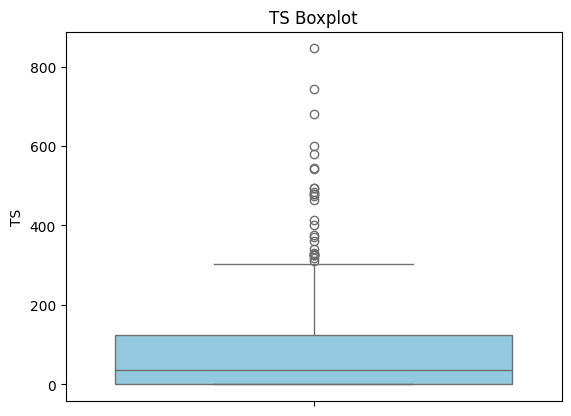

In [523]:
boxplot =df['TS']
sns.boxplot(data=boxplot,color='skyblue')
plt.title('TS Boxplot');

#### Bivariate

In [524]:
data = df[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis']]
df_corr =data.corr(numeric_only=True)
df_corr

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


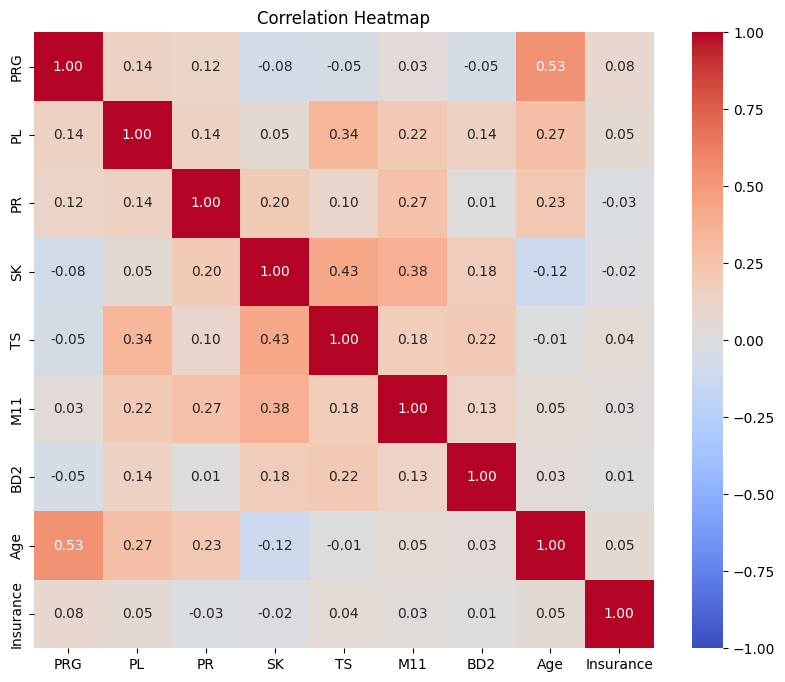

In [525]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

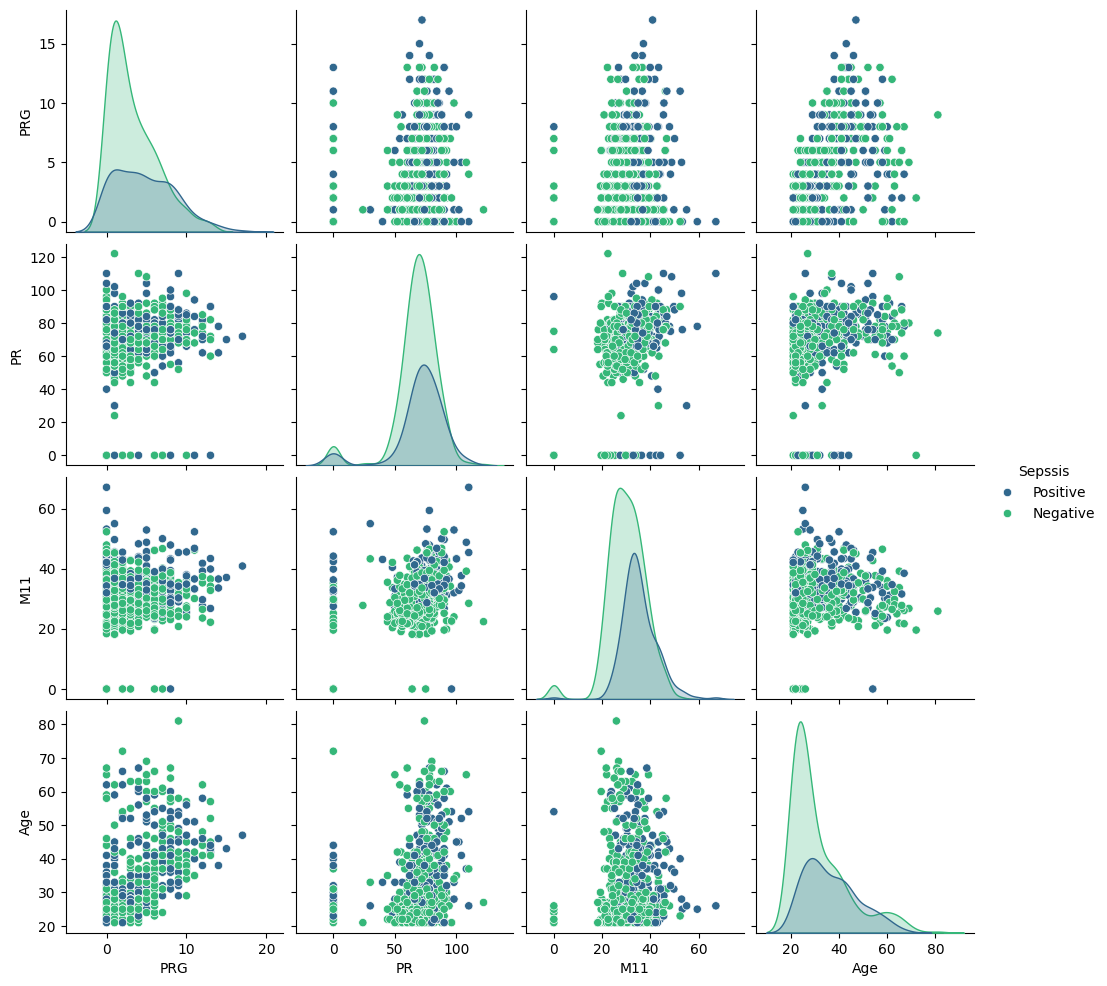

In [526]:
data = df[['PRG','PR','M11','Age', 'Sepssis']]
sns.pairplot(data=data,hue='Sepssis',palette='viridis',kind='scatter')
plt.show()

## **Questions**

#### 1. Does Age affect Blood Pressure(PR)?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12760\2530256272.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pr_summary = df.groupby('Age_Group')['PR'].agg(['count', 'mean'])


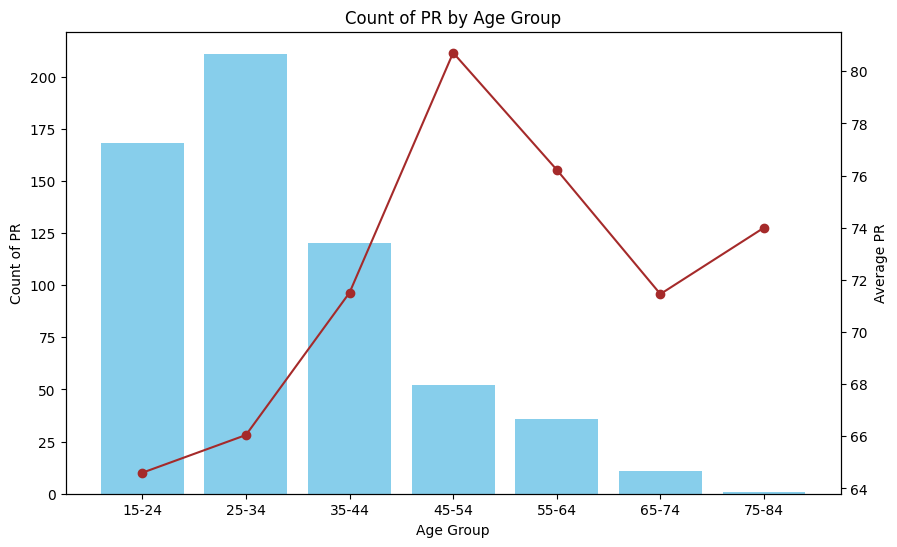

In [527]:
age_pr_count = df.groupby('Age')['PR'].count()

# Create subplots
age_bins = range(15, 91, 10)
age_labels = [f"{i}-{i+9}" for i in range(15, 81, 10)]

# Bin ages into age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Age_Group' and calculate count and average of PR
age_pr_summary = df.groupby('Age_Group')['PR'].agg(['count', 'mean'])

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting count of PR by age group in bar chart
ax1.bar(age_pr_summary.index, age_pr_summary['count'], color='skyblue')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count of PR')
ax1.set_title('Count of PR by Age Group')

# Create a second y-axis for average PR values
ax2 = ax1.twinx()
ax2.plot(age_pr_summary.index, age_pr_summary['mean'], color='brown', marker='o', linestyle='-')
ax2.set_ylabel('Average PR')

# Show plot
plt.show()

##### 2. How many Patients Have Insurance Cover?

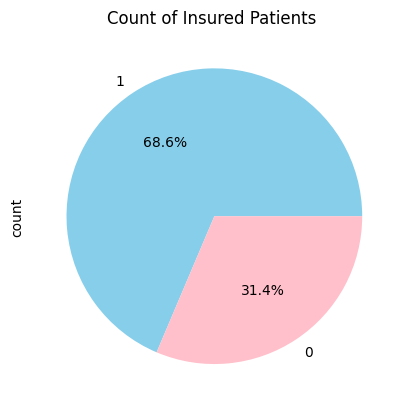

In [528]:
df['Insurance'].replace({0: 'No', 1: 'Yes'})
#label = [if df['Insurance']==1,{'yes'},else {'No'}]
# Group by 'Insurance' and count occurrences
insurance_count = df['Insurance'].value_counts()
insurance_count.plot(kind='pie',colors=('skyblue','pink'),autopct='%1.1f%%')
# Create a Pie chart using Plotly
plt.title('Count of Insured Patients ')
plt.show()
# Show the plot


#### 3.What is the concentrated age group of most patients? And do they have Insurance Cover?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12760\2528140089.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_insurance_counts = df.groupby(['Age_Group', 'Insurance']).size().unstack(fill_value=0)


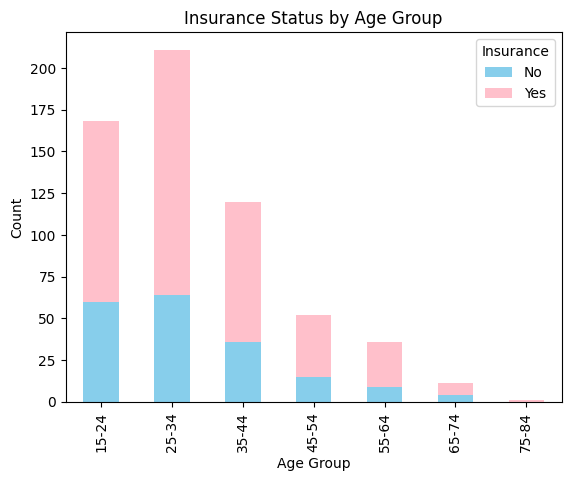

In [529]:
age_bins = range(15, 91, 10)
age_labels = [f"{i}-{i+9}" for i in range(15, 81, 10)]

# Bin ages into age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by age groups and insurance status
age_insurance_counts = df.groupby(['Age_Group', 'Insurance']).size().unstack(fill_value=0)

# Plotting
ax = age_insurance_counts.plot(kind='bar', stacked=True, color=('skyblue', 'pink'))

# Set plot title and labels
plt.title('Insurance Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Set legend
plt.legend(title='Insurance', labels=['No', 'Yes'])

plt.show()

#### 4. Does high PRG contribute to Sepssis?

In [530]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'Age_Group'],
      dtype='object')

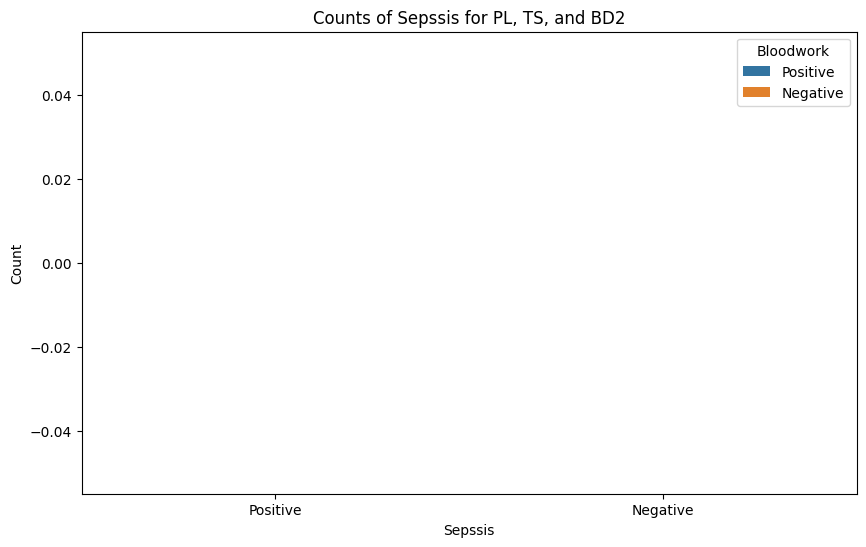

In [531]:
import matplotlib.pyplot as plt

#Group by 'PL', 'TS', 'BD2', and 'Sepssis' and count occurrences

bloodwork = df.groupby(['PL', 'TS', 'BD2'])['Sepssis'].count().reset_index()
# Specify the data and x-axis ('Sepssis')
#ax = sns.catplot(data=bloodwork, x="Sepssis", order=['Positive', 'Negative'], kind="count")

#bloodwork_melted = bloodwork.melt(id_vars='Sepssis', var_name='Bloodwork')

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=bloodwork, x='Sepssis', hue='Sepssis', hue_order=['Positive', 'Negative'], order=['Positive', 'Negative'])
plt.title('Counts of Sepssis for PL, TS, and BD2')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.legend(title='Bloodwork')

plt.show()


#bloodwork.plot.bar(x='Sepssis')

5. What is the highest type of blood work done?

### **Hypothesis Testing:**

* Null: High Body Mass does not attribute to high Blood Pressure(PR)
* Alternative : High body mass(M11) attributes to high Blood Pressure(PR)

In [532]:
blood_pressure = df['PR']
body_mass_index = df['M11']

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(blood_pressure, body_mass_index)
print(f"Correlation coefficient: {corr_coefficient:.2f}")
print(f"P-value: {p_value}")

# Results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant correlation between blood pressure and body mass index.")
else:
    print("Fail to reject the null hypothesis - There is no significant correlation between blood pressure and body mass index.")

Correlation coefficient: 0.27
P-value: 1.9989399562103356e-11
Reject the null hypothesis - There is a significant correlation between blood pressure and body mass index.


* The correlation coefficient, often denoted as r, is a statistical measure that quantifies the strength and direction of the linear relationship between two variables
* The correlation coefficient provides a numerical value that represents the strength of the linear relationship between the two variables. It ranges from -1 to 1, where:
  * r=1 indicates a perfect positive linear relationship (as one variable increases, the other variable increases).
  * r=−1 indicates a perfect negative linear relationship (as one variable increases, the other variable decreases).
  * r=0 indicates no linear relationship between the variables

#### **Insights:**
* Datasets do not have missing values
* Datasets do not have duplicated values
* Dataset does not have a normal distribution with some being skewed to the right
* Except for insurance all the data columns have outliers
* Most of the data is positively correlated with one another with only a few negative correlation like SK having a negative correlation of -0.12 with age, and PRG having a -0.08 correlation with SK.
* PRG has a positive correlation of 0.53 with Age while SK a correlation of 0.43 with TS.
* Most patients are between the ages of 25 to 34 and most of them are insured.
* There is a significant correlation between body mass index and blood pressure as seen from the Hypothesis testing conclusion

## **3. DATA PREPARATION**

##### Split Data to X,y

In [533]:
df.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,Age_Group
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,45-54
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,25-34
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,25-34


In [534]:
X = df.drop(columns=['ID','Sepssis','Age_Group'])
X_features = X.columns

In [535]:
y = df['Sepssis']
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

In [536]:
df['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [537]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, random_state=42)

#### Encode y-label

In [538]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

#### create pipeline

In [539]:
preprocessor = ColumnTransformer(transformers=[
    ('imputer',SimpleImputer(strategy='median'),X_features),
    ('scaler',RobustScaler(),X_features),
    ('log_transformation',FunctionTransformer(np.log1p),X_features)
])

#### Check dataset

In [540]:
X_train.shape

(449, 9)

In [541]:
X_test.shape

(150, 9)

In [542]:
y_train.value_counts()

Sepssis
Negative    293
Positive    156
Name: count, dtype: int64

In [543]:
y_test.value_counts()

Sepssis
Negative    98
Positive    52
Name: count, dtype: int64

#### Modeling & Evaluation

In [544]:
models = [
    ('knn',KNeighborsClassifier()),
    ('logistic_regression',LogisticRegression(solver='liblinear',random_state=42)),
    ('decision_tree',DecisionTreeClassifier(random_state=42)),
    ('random_forest',RandomForestClassifier(random_state=42))
]

target_names = ['Positive','Negative']

#### TRAIN MODELS

In [545]:
for model_name,classifier in models:
    
    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('models',classifier)
    ])

    pipeline.fit(X_train,y_train_encoded)
    y_predict = pipeline.predict(X_test)

    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_predict,target_names=target_names))
    print('='*70)

Report for knn
              precision    recall  f1-score   support

    Positive       0.75      0.79      0.77        98
    Negative       0.56      0.52      0.54        52

    accuracy                           0.69       150
   macro avg       0.66      0.65      0.66       150
weighted avg       0.69      0.69      0.69       150



Report for logistic_regression
              precision    recall  f1-score   support

    Positive       0.80      0.85      0.82        98
    Negative       0.67      0.60      0.63        52

    accuracy                           0.76       150
   macro avg       0.74      0.72      0.73       150
weighted avg       0.76      0.76      0.76       150

Report for decision_tree
              precision    recall  f1-score   support

    Positive       0.73      0.83      0.78        98
    Negative       0.56      0.42      0.48        52

    accuracy                           0.69       150
   macro avg       0.65      0.62      0.63       150
weighted avg       0.67      0.69      0.67       150

Report for random_forest
              precision    recall  f1-score   support

    Positive       0.78      0.85      0.81        98
    Negative       0.65      0.54      0.59        52

    accuracy                           0.74       150
   macro avg       0.71      0.69      0.70    

#### UNBALANCED MODELS

In [546]:
unbalanced_metrics = pd.DataFrame(columns=['model_name','Accuracy','Precision','recall','f1_score'])

all_pipelines = {}

for model_name,classifier in models:

    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('models',classifier)
    ])


    pipeline.fit(X_train,y_train_encoded)

    y_predict = pipeline.predict(X_test)

   

    metrics= classification_report(y_test_encoded,y_predict,output_dict=True)

    all_pipelines[model_name] =pipeline

    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score =metrics ['weighted avg']['f1-score']

    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy,precision,recall,f1_score]

unbalanced_metrics.sort_values(by='f1_score',ascending=False)

,model_name,Accuracy,Precision,recall,f1_score
1,logistic_regression,0.760000,0.755033,0.760000,0.756217
3,random_forest,0.740000,0.732528,0.740000,0.733392
0,knn,0.693333,0.688203,0.693333,0.690267
2,decision_tree,0.686667,0.672312,0.686667,0.674031


In [547]:
all_pipelines['knn']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                ('models', KNeighborsClassifier())])

* From the trained models, the Logistic regression is the best performing out of the the four trained models with an F1-score of 0.75 and  a recall of 76% with an 85% of positive predictions and 60% negative prediction.
* The random Forest follows LR closely with an F1 score of 0.73 and a recall of 74% with an 85% for the positive predictions and 54% of the negative predictions.

#### BALANCE DATA SET

In [548]:

sampler = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)

In [549]:
pd.DataFrame(y_train_resampled).value_counts()

0
0    293
1    293
Name: count, dtype: int64

In [550]:
len(y_train_resampled)

586

In [551]:
len(X_train_resampled)

586

#### Models training after balancing dataset

In [552]:
balanced = pd.DataFrame(columns=['Model_name','Accuracy','Precision','recall','f1_score'])

bal_pipelines = {}
for model_name,classifier in models:


   pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('models',classifier)
    ])
   
   pipeline.fit(X_train_resampled,y_train_resampled) 

   y_predict = pipeline.predict(X_test)

   metrics = classification_report(y_test_encoded,y_predict, output_dict=True)

   bal_pipelines[model_name] = pipeline

   accuracy = metrics['accuracy']
   precision = metrics['weighted avg']['precision']
   recall = metrics['weighted avg']['recall']
   f1_score = metrics['weighted avg']['f1-score']

   balanced.loc[len(balanced)] = [model_name, accuracy,precision,recall,f1_score]

balanced.sort_values(by='f1_score',ascending=False)
   

,Model_name,Accuracy,Precision,recall,f1_score
1,logistic_regression,0.760000,0.771259,0.760000,0.763465
3,random_forest,0.733333,0.733333,0.733333,0.733333
0,knn,0.673333,0.720356,0.673333,0.681199
2,decision_tree,0.673333,0.664000,0.673333,0.667179


* After balancing the dataset, the Logistic regression is still the best performing model with an F1-score of 0.76 from 0.75. The recall perfomance has not changed but the precision has improved from 75% to 77%.
* There is no improvement in the rest of the models.

## **5. HYPERPARAMETER TUNING**

In [571]:
tuned_df = pd.DataFrame(columns=['Model_name','Accuracy','Precision','recall','f1_score'])


param_grids = {
    'knn': {
        'models__n_neighbors': [3, 5, 7],
        'models__weights': ['uniform', 'distance'],
        'models__metric': ['euclidean', 'manhattan']
    },
    'logistic_regression': {
        'models__C': [0.1, 1, 10],
        'models__penalty': ['l1', 'l2'],
        'models__solver': ['liblinear']
    },
    'decision_tree': {
        'models__max_depth': [None, 5, 10, 20],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'models__n_estimators': [50, 100, 200],
        'models__max_depth': [None, 10, 20],
        'models__min_samples_split': [2, 5, 10],
    }
}


for model_name,pipeline in all_pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline,param_grid,cv=5,scoring='f1')
    grid_search.fit(X_train, y_train_encoded)


    best_pipeline = grid_search.best_estimator_
    all_pipelines[model_name] = best_pipeline

    y_predict = best_pipeline.predict(X_test)

    tuned_metrics = classification_report(y_test_encoded,y_predict, output_dict=True)

    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    tuned_df.loc[len(tuned_df)] = [model_name, accuracy,precision,recall,f1_score]

tuned_df.sort_values(by='f1_score',ascending=False)
   

    

e:\AZUBI\DATA ANALYTICS\Analytics\PROJECTS\Project 5\Career_Accelerator_P5-ML_API\venv\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\AZUBI\DATA ANALYTICS\Analytics\PROJECTS\Project 5\Career_Accelerator_P5-ML_API\venv\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\AZUBI\DATA ANALYTICS\Analytics\PROJECTS\Project 5\Career_Accelerator_P5-ML_API\venv\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\AZUBI\DATA ANALYTICS\Analytics\PROJECTS\Project 5\Career_Accelerator_P5-ML_API\venv\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\AZUBI\DATA ANALYTICS\Analytics\PROJECTS\Project 5\Career_Acce

,Model_name,Accuracy,Precision,recall,f1_score
0,knn,0.733333,0.733333,0.733333,0.733333
1,logistic_regression,0.733333,0.733333,0.733333,0.733333
2,decision_tree,0.733333,0.733333,0.733333,0.733333
3,random_forest,0.733333,0.733333,0.733333,0.733333


In [554]:
classifier = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier)
])
   

   

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

# Create GridSearchCV with the instantiated pipeline
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='f1')

In [555]:
best_estimator = grid_search.best_estimator_

test_accuracy = best_estimator.score(X_test, y_test_encoded)
print(f"Test Accuracy for random_forest:, {test_accuracy:.3f}")

Test Accuracy for random_forest:, 0.747


In [556]:
classifier1 = KNeighborsClassifier()

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier1)
])
   
# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7],  
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Create GridSearchCV with the instantiated pipeline
grid_search1 = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search1.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

In [557]:
best_estimator1 = grid_search1.best_estimator_

test_accuracy = best_estimator1.score(X_test, y_test_encoded)
print(f"Test Accuracy for knn: {test_accuracy:.3f}")

Test Accuracy for knn: 0.693


In [558]:
classifier3 = LogisticRegression(random_state=42,max_iter=1000)

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier3)
])
   

#  parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10],  
    'classifier__penalty': ['l1', 'l2'],  
    'classifier__solver': ['liblinear'],  # Solver for logistic regression
}

# Create GridSearchCV with the instantiated pipeline
grid_search2 = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search2.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='f1')

In [559]:
best_estimator2 = grid_search2.best_estimator_

test_accuracy = best_estimator2.score(X_test, y_test_encoded)
print(f"Test Accuracy for Logistic:, {test_accuracy:.3f}")

Test Accuracy for Logistic:, 0.767


In [560]:
classifier4 = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier4)
])
   

   

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create GridSearchCV with the instantiated pipeline
grid_search3 = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

# Fit the GridSearchCV on your data
grid_search3.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                                        ('log_transformation',
                                                                         Funct...
                                                                         Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x000001B3F7006710>)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='f1')

In [561]:
best_estimator3 = grid_search3.best_estimator_

test_accuracy = best_estimator3.score(X_test, y_test_encoded)
print(f"Test Accuracy for DecisionTree:, {test_accuracy:.3f}")

Test Accuracy for DecisionTree:, 0.687


In [568]:
best_estimator = grid_search.best_estimator_
best_estimator1 = grid_search1.best_estimator_
best_estimator2 = grid_search2.best_estimator_
best_estimator3 = grid_search3.best_estimator_

best_estimators = {
    'Random Forest': best_estimator,
    'KNN': best_estimator1,
    'Logistic Regression': best_estimator2,
    'Decision Tree': best_estimator3
}

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Test Accuracy'])

# Iterate over the best_estimators dictionary
for model_name, best_estimator in best_estimators.items():
    # Calculate test accuracy
    test_accuracy = best_estimator.score(X_test, y_test_encoded)
    #results = results_df.append({'Model': model_name, 'Test Accuracy': test_accuracy}, ignore_index=True)

# Print DataFrame

    #Append results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [model_name], 'Test Accuracy': [test_accuracy]})])

# Print DataFrame
print(results_df)

                 Model  Test Accuracy
0        Random Forest       0.746667
0                  KNN       0.693333
0  Logistic Regression       0.766667
0        Decision Tree       0.686667


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12760\3232483905.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Model': [model_name], 'Test Accuracy': [test_accuracy]})])


In [574]:
# for model_name,pipeline in all_pipelines.items():
#     joblib.dump(pipeline, f'../models/{model_name}.pkl')


joblib.dump(le, 'label_encoder.pkl')
# joblib.dump(best_estimator1, 'knn.pkl')
# joblib.dump(best_estimator2, 'LogisticRegression.pkl')
# joblib.dump(best_estimator3, 'Decision_Tree.pkl')

['label_encoder.pkl']

* After tuning the models, their perfomance still does not improve as Logistic Regression is still the better model with an accuracy score of 0.76.
* There is improvement of the knn and decision tree as they register an accuracy score of 0.69 and 0.68 from the previous balanced score of 0.67 for both.

## **EVALUATE MODEL WITH TEST DATASET**

In [ ]:
df_test.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


In [ ]:
loaded_model = joblib.load('./models/LogisticRegression.pkl')

In [ ]:
path = r'E:\AZUBI\DATA ANALYTICS\Analytics\PROJECTS\Project 5\Career_Accelerator_P5-ML_API\data\Paitients_Files_Test.csv'
test_data = pd.read_csv(path)

if hasattr(loaded_model, 'named_steps'):
    # Get the preprocessor from the loaded pipeline
    preprocessor = loaded_model.named_steps['preprocessor']
    
    # Transform the new data using the preprocessor
    new_data_preprocessed = preprocessor.transform(test_data)
else:
    # No preprocessing step in the pipeline
    new_data_preprocessed = test_data

# Make predictions using the loaded logistic regression pipeline
y_pred_proba = loaded_model.predict_proba(new_data_preprocessed)[:, 1]